# How do we handle missing values in data? Follow this simple flowchart!

##### This notebook was originally created by Kaggle user: https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python
##### I modify, explain, and discuss some of the methods presented

![](https://imgur.com/68u0dD2.png)

>Data often contains missing values. There are multiple possible reasons for this. 

>> Values don't exist

>> Collection errors

>> Accidental deletion

It is important to be aware of what data is missing from a dataset. However, models like `XGBoost` and `LightGBM` are able to handle missing data quite well. 
<hr>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Loading-necessary-libraries-and-datasets" data-toc-modified-id="Loading-necessary-libraries-and-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading necessary libraries and datasets</a></span><ul class="toc-item"><li><span><a href="#Reading-in-the-dataset" data-toc-modified-id="Reading-in-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reading in the dataset</a></span></li><li><span><a href="#Examining-the-Target-column" data-toc-modified-id="Examining-the-Target-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Examining the Target column</a></span></li></ul></li><li><span><a href="#Detecting-Missing-values" data-toc-modified-id="Detecting-Missing-values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Detecting Missing values</a></span><ul class="toc-item"><li><span><a href="#Detecting-missing-values-numerically" data-toc-modified-id="Detecting-missing-values-numerically-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Detecting missing values numerically</a></span></li><li><span><a href="#Detecting-missing-data-visually-using-Missingno-library" data-toc-modified-id="Detecting-missing-data-visually-using-Missingno-library-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Detecting missing data visually using Missingno library</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-locations-of-the-missing-data" data-toc-modified-id="Visualizing-the-locations-of-the-missing-data-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Visualizing the locations of the missing data</a></span></li></ul></li></ul></li><li><span><a href="#Reasons-for-Missing-Values" data-toc-modified-id="Reasons-for-Missing-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reasons for Missing Values</a></span><ul class="toc-item"><li><span><a href="#Finding-reason-for-missing-data-using-matrix-plot" data-toc-modified-id="Finding-reason-for-missing-data-using-matrix-plot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Finding reason for missing data using matrix plot</a></span></li><li><span><a href="#Finding-reason-for-missing-data-using-a-Heatmap" data-toc-modified-id="Finding-reason-for-missing-data-using-a-Heatmap-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Finding reason for missing data using a Heatmap</a></span></li><li><span><a href="#Finding-reason-for-missing-data-using-Dendrogram" data-toc-modified-id="Finding-reason-for-missing-data-using-Dendrogram-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Finding reason for missing data using Dendrogram</a></span></li></ul></li><li><span><a href="#Treating-Missing-values" data-toc-modified-id="Treating-Missing-values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Treating Missing values</a></span><ul class="toc-item"><li><span><a href="#Deletions" data-toc-modified-id="Deletions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Deletions</a></span><ul class="toc-item"><li><span><a href="#Pairwise-Deletion" data-toc-modified-id="Pairwise-Deletion-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Pairwise Deletion</a></span></li><li><span><a href="#Listwise-Deletion/-Dropping-rows" data-toc-modified-id="Listwise-Deletion/-Dropping-rows-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Listwise Deletion/ Dropping rows</a></span></li><li><span><a href="#Dropping-complete-columns" data-toc-modified-id="Dropping-complete-columns-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Dropping complete columns</a></span></li></ul></li><li><span><a href="#Imputations-Techniques-for-non-Time-Series-Problems" data-toc-modified-id="Imputations-Techniques-for-non-Time-Series-Problems-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Imputations Techniques for non Time Series Problems</a></span></li><li><span><a href="#Imputations-Techniques-for-Time-Series-Problems" data-toc-modified-id="Imputations-Techniques-for-Time-Series-Problems-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Imputations Techniques for Time Series Problems</a></span><ul class="toc-item"><li><span><a href="#Time-Series-dataset" data-toc-modified-id="Time-Series-dataset-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Time Series dataset</a></span></li><li><span><a href="#Imputing-using-ffill" data-toc-modified-id="Imputing-using-ffill-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Imputing using ffill</a></span></li><li><span><a href="#Imputation-using-bfill" data-toc-modified-id="Imputation-using-bfill-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Imputation using bfill</a></span></li><li><span><a href="#Imputation-using-Linear-Interpolation-method" data-toc-modified-id="Imputation-using-Linear-Interpolation-method-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Imputation using Linear Interpolation method</a></span></li></ul></li><li><span><a href="#Advanced-Imputation-Techniques" data-toc-modified-id="Advanced-Imputation-Techniques-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Advanced Imputation Techniques</a></span><ul class="toc-item"><li><span><a href="#K-Nearest-Neighbor-Imputation" data-toc-modified-id="K-Nearest-Neighbor-Imputation-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>K-Nearest Neighbor Imputation</a></span></li><li><span><a href="#Multivariate-feature-imputation---Multivariate-imputation-by-chained-equations-(MICE)" data-toc-modified-id="Multivariate-feature-imputation---Multivariate-imputation-by-chained-equations-(MICE)-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Multivariate feature imputation - Multivariate imputation by chained equations (MICE)</a></span></li></ul></li></ul></li><li><span><a href="#Algorithms-which-handle-missing-values" data-toc-modified-id="Algorithms-which-handle-missing-values-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Algorithms which handle missing values</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References-and-good-resources" data-toc-modified-id="References-and-good-resources-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References and good resources</a></span></li></ul></div>

# Objective
This notebook walks through the detection of missing values in datasets and how to handle them with methods such as imputation. 
<hr>


# Dataset Access 

There are two publically available datasets which we will explore to discuss missing values:

* 1. [Titanic Dataset](https://www.kaggle.com/c/titanic) (non time-series data)
* 2. [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) (time series data)


# Library installation

In [8]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

In [9]:
#read in the non-time series dataset
os.listdir('../input/titanic')

In [10]:
#let's quickly check out what the datasets look like
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head()


## What is our most obvious target in this dataset?

> We could aim to predict a few things here like Age or Fare. But the most obvious and interesting target variable is survival. 



In [11]:
#here we want to determine see the distribution of survival (this is a Bernoulli distribution describing a binary variable)
train['Survived'].value_counts()

In [12]:
#visualize the distribution of survival

s = sns.countplot(x = 'Survived',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14) 

* 0: Did not Survive 
* 1: Survived

>Since the focus of the notebook is to detect and handle missing values, we'll jump directly into it. Let's now look at a step by step process to manage the missing values in a dataset.
<hr>

# Detecting Missing values

## Detecting missing values numerically 

>The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [13]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [14]:
train_missing= missing_values_table(train)
train_missing

In [15]:
test_missing= missing_values_table(test)
test_missing

Both the train and test sets have a very similar proportion of missing values.  

## Detecting missing data visually using Missingno library

>To graphically analyze missing data, we use the library [Missingno](https://github.com/ResidentMario/missingno) It is a package for graphical analysis of missing values. We imported the library as 'msno.'

In [54]:
msno.bar(train, fontsize = '12')


> Here we see that Age, Cabin and Embarked columns have missing values. Now we can search for the locations of the missing values. 

### Visualizing the locations of the missing data 

>The [msno.matrix](https://github.com/ResidentMario/missingno#matrix) nullity matrix is a data density visualization that allows us to visualize data completion.


In [56]:
msno.matrix(train)

>* The plot appears blank(white) wherever there are missing values. For instance, in Embarked column there are only two instances of missing data, hence the two white lines.
>
>* The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.
>
>It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's examine the first 100 rows.

In [18]:
msno.matrix(train.sample(100))

This shows that the Embarked column has no nullity in the first 100 cases while 'cabin' is very sparsely completed. 

# Reasons for Missing Values 

> Let's consider the three main reasons for data incompletion:
![](https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1)

source:https://cjasn.asnjournals.org/content/early/2014/02/06/CJN.10141013/tab-figures-data?versioned=true


**1. Missing Completely at Random (MCAR) **

>The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

**2. Missing at Random (MAR) **

>MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

**3. Missing Not at Random (MNAR) **
>Missingness depends on unobserved data or the value of the missing data itself. 

*All definitions taken from Wikipedia: https://en.wikipedia.org/wiki/Missing_data*


>Let's try to identify what type of missingness is prevalent in this data:


## Determining cause of missing data using matrix plot 

In [19]:
msno.matrix(train)

> The `Embarked` Column has very few missing values and this does not seem to be correlated with any other column, We can call this missing at random. 
* Both the `Age` and the `Cabin` columns have a lot of missing values and we need to investigate further to determine cause. 

The missingno package also let's us sort the graph by a particluar column. Let's sort the values by `Age` and `Cabin` column to see if there is a pattern in the missing values

In [20]:
#sorted by Age
sorted = train.sort_values('Age')
msno.matrix(sorted)

We don't see parallel missingness here between the two features, so probably safe to assume the missingness isn't correlated between the two features. 

## Further investigating missing data using a Heatmap 

In [21]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is further evidence that the values are MAR.

## Finding reason for missing data using Dendrogram 
A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.

In [22]:
msno.dendrogram(train)

>Let's read the above dendrogram from a top-down perspective: 
* Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)
>
>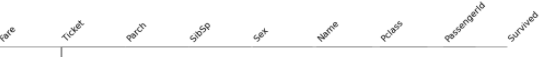
>
>* the missingness of Embarked tends to be more similar to Age than to Cabin and so on.However, in this particluar case, the correlation is high since Embarked column has a very few missing values.

This dataset doesn't have many missing values but if you use the same methodology on datasets with many missing values, some interesting patterns would likely emerge.

# What do we do about missing values? 'Treating' missing values: 

After having identified the patterns in missing values, it is important to treat them too. Here is helpful flowchart:



## Deletions 

![](https://imgur.com/tBvdfyX.png)

>Deletion means to delete the missing values from a dataset. This is however not recommended as it might result in loss of information from the dataset. We should only delete the missing values from a dataset if their proportion is very small. If we opt for deletion there are three types:

### Pairwise Deletion 

Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.




In [23]:
train.isnull().sum()

In [24]:
train_1 = train.copy()
train_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.


### Listwise Deletion/ Dropping rows

> In listwise deletion, complete rows (containing the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.


In [25]:
#Drop rows that contain any NaN or missing value for Age column
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

>The Age column doesn't have any missing values.A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. That's why it is advisable to use it only when the number of missing values is very small.


### Dropping complete columns 

If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.


## Imputations Techniques for non Time Series Problems 

![](https://imgur.com/bL0iHde.png)

>Imputation means replacing missing data with substituted values. There are various imputation methodologies depending upon the nature of the problem and data. Imputation techniques can be broadly described as follows:


### Basic Imputation Techniques
  
  - Imputation of static value
  - Imputation of descriptive measures (mean, median or most frequent) from each column in which the missing values are located

We can use `The SimpleImputer` class from sklearn.

In [26]:
# imputing with a constant

from sklearn.impute import SimpleImputer
train_constant = train.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)

#let's test whether it filled all null values
train_constant.isnull().sum()

In [27]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()

#setting strategy to 'most frequent' to impute the null values with the MODE or most frequent value.

mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [28]:
#testing for null values

train_most_frequent.isnull().sum()

## Imputation Techniques for Time Series Problems

Now let's look at ways to impute data in a typical time series problem. Remember, time series data is data that consists of repeated measurements over a period of time. Addressing missing values in time Series data is a bit different. The `fillna()` method is used for imputing missing values in such problems.

* Basic Imputation Techniques
  - 'ffill' or 'pad' - Replace NaN s with last observed value in time
  - 'bfill' or 'backfill' - Replace NaN s with next observed value in time
  -  Linear interpolation method (this is a function that fits a curve between a set of discrete values. 

### Time Series dataset

The dataset is called [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) and it contains air quality data and AQI (Air Quality Index) at hourly and daily intervals across measurement stations and multiple cities in India. There are many missing values due to the nature of time series data. (The data collector has to be very consistent, for example). 

In [29]:
os.listdir('../input/air-quality-data-in-india')

In [30]:
#explore dataset to look at features, etc. 

city_day = pd.read_csv('../input/air-quality-data-in-india/city_day.csv',parse_dates=True,index_col='Date')
city_day1=city_day.copy(deep=True)
city_day.head()

In [31]:
#Missing Values
city_day_missing= missing_values_table(city_day)
city_day_missing

There are a lot of missing values and some of the columns like Xylene and PM10 have more than 50% of the values missing. Let's now see how we can impute these missing values.
Keep in mind, the value of imputing more than 50% of datapoints is definitely controversial. It would be wise to look at the distribution of the existing values to determine whether the predicted values would be reasonably accurate. If the feature is not important, it might be worth dropping it from the df. 



In [32]:
#let's test ffill with a small range of values

city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]

We can see that all missing values have been filled with the last observed values.

### Imputation using bfill

In [33]:
# Imputing AQI value

city_day['AQI'][20:30]

In [34]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

Here all missing values have been filled with the next observed values.

### Imputation using Linear Interpolation method

Remember that time series data compiles observations over a span of time. Therefore it doesn't make a whole lot of sense to fill missing values with a value already observed. Unless there is nearly no change over the x-axis. This is where interpolation shines. However, this is assuming that the change in the variable over time is linear. Or at least close to it. 

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilizes non-missing values from adjacent data points to compute a value for a missing data point. 

Refer to the official documentation for a complete list of interpolation strategies [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [35]:
city_day1['Xylene'][50:65]

In [36]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

## Advanced Imputation Techniques 

Advanced imputation techniques use machine learning to impute missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We'll look at the following two methods:

* [Nearest neighbors imputation](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)
* [Multivariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

### K-Nearest Neighbor Imputation

The [KNNImputer class](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation) provides imputation for filling in missing values using the k-Nearest Neighbors approach. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. 

In [37]:
train_knn = train.copy(deep=True)

In [44]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)


knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [45]:
train_knn['Age'].isnull().sum()


### Multivariate feature imputation - Multivariate imputation by chained equations (MICE)
A strategy for imputing missing values by modeling each feature with missing values as a function of other features. It fits multiple regression functions over random samples of the data, then returns the average of the regression coefficients and uses that value to impute the missing value. We will do this in sci-kit learn:



In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [47]:
train_mice['Age'].isnull().sum()

# Algorithms that handle missing values

Some algorithms like XGBoost and LightGBM can handle missing values without any preprocessing, by supplying relevant parameters.

* [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
![](https://imgur.com/GNlcWoJ.png)

* [LightGBm](https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html)
![](https://imgur.com/GVdcx7h.png)


# Remember
There is not one perfect way to handle missing data values. There is room for a lot of experimentation. A huge part of building a successful model is the data that we feed it!

# Good resources and references

* [Dealing with Missing Data in Python](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)
* [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)